<center>
    <h1> Bài Tập Lớn : Datamining</h1>
    <h2> Đề Tài : Phân loại cảm xúc <h2>
 </center>

---

In [3]:
import pandas as pd
import re
from textblob import TextBlob
import warnings

warnings.filterwarnings('ignore')

In [4]:
# Đọc File 
df = pd.read_csv("Data.csv")
df.info

<bound method DataFrame.info of      Unnamed: 0.1  Unnamed: 0  \
0               0           0   
1               1           1   
2               2           2   
3               3           3   
4               4           4   
..            ...         ...   
727           728         732   
728           729         733   
729           730         734   
730           731         735   
731           732         736   

                                                  Text            Timestamp  \
0     Enjoying a beautiful day at the park!        ...  2023-01-15 12:30:00   
1     Traffic was terrible this morning.           ...  2023-01-15 08:45:00   
2     Just finished an amazing workout! 💪          ...  2023-01-15 15:45:00   
3     Excited about the upcoming weekend getaway!  ...  2023-01-15 18:20:00   
4     Trying out a new recipe for dinner tonight.  ...  2023-01-15 19:55:00   
..                                                 ...                  ...   
727  Collaborating

In [5]:
#Hiển thị 5 dòng đầu tiên
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [6]:
#Hiển thị 5 dòng cuối cùng
df.tail()

,Unnamed: 0.1,Unnamed: 0,Text,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
727,728,732,Collaborating on a science project that receiv...,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20
731,732,736,Organizing a virtual talent show during challe...,2020-11-15 15:15:00,VirtualTalentShowSuccessHighSchool,Instagram,#VirtualEntertainment #HighSchoolPositivity,24.0,47.0,USA,2020,11,15,15


In [7]:
#Hiển thị nội dung một comment bất kỳ
print(df.loc[[123],['Text']].values)

[[' The euphoria of a live music concert under the stars.  ']]


**Kiểm tra dữ liệu thiếu, dữ liệu trùng lặp:**
---

In [8]:
#Kiểm tra dữ liệu missing trong tập: 
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [9]:
#Kiểm tra dữ liệu trùng lặp:
df.duplicated().sum()

np.int64(0)

In [10]:
df = df[['Text']]

In [11]:
df.head()

,Text
0,Enjoying a beautiful day at the park! ...
1,Traffic was terrible this morning. ...
2,Just finished an amazing workout! 💪 ...
3,Excited about the upcoming weekend getaway! ...
4,Trying out a new recipe for dinner tonight. ...


In [12]:
#Kiểm tra dữ liệu trùng lặp:
df.duplicated().sum()

np.int64(25)

In [13]:
#Liệt kê các bản ghi trùng lặp
df[df.duplicated()==True].sort_values(by='Text')

,Text
278,"A compassionate rain, tears of empathy fallin..."
292,"A compassionate rain, tears of empathy fallin..."
285,"A free spirit soaring on the wings of dreams,..."
281,"A playful escapade in the carnival of life, c..."
295,"A playful escapade in the carnival of life, c..."
286,"Bathed in the golden hues of gratefulness, a ..."
291,Charting a course through the waves of hopefu...
287,"Confident strides in the dance of life, a bal..."
329,"Dismissive gestures, a curtain drawn to shiel..."
280,"Embraced by the hopeful dawn, a gardener sowi..."


In [14]:
#Xóa các dữ liệu trùng lặp giữ lại bản ghi đầu tiên:
df.drop_duplicates(keep='first',inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    707 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


## Định nghĩa và chạy thử các hàm


In [15]:
#  ĐỊNH NGHĨA HÀM LÀM SẠCH VĂN BẢN (Text Preprocessing)
def clean_text(text):
    if pd.isna(text):
        return ""
    
    text = str(text).lower() # 1. Chuyển về chữ thường
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # 2. Xóa URL
    text = re.sub(r'@\w+|#\w+|[^\w\s]', '', text) # 3. Xóa mentions, hashtags, và dấu câu
    text = re.sub(r'\d+', '', text) # 4. Xóa số
    text = re.sub(r'\s+', ' ', text).strip() # 5. Xóa khoảng trắng thừa

    return text

print(" Hàm clean_text đã được định nghĩa.")

 Hàm clean_text đã được định nghĩa.


In [16]:
text="Enjoying a beautiful day at the park! "

In [17]:
#Kiểm tra hàm clean_text():
print("Dữ liệu ban đầu: \n", text)
print('-----------------------------------------------')

text1 = clean_text(text)
print("Dữ liệu sau khi xử lý: \n", text1)

Dữ liệu ban đầu: 
 Enjoying a beautiful day at the park! 
-----------------------------------------------
Dữ liệu sau khi xử lý: 
 enjoying a beautiful day at the park


In [18]:
#stopwords là những từ xuất hiện nhiều trong văn bản, nhưng ko có ý nghĩa 
#Load danh sách Stopword trong tiếng anh
from nltk.corpus import stopwords
stop = stopwords.words('english')

#Hiển thị danh sách các stopwords trong tiếng anh
print('Tổng số stopwords trong tiếng anh:',len(stop))
print('Hiển thị danh sách các stopwords trong tiếng anh:\n',stop)

Tổng số stopwords trong tiếng anh: 198
Hiển thị danh sách các stopwords trong tiếng anh:
 ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', '

In [19]:
#hàm clear_stopwords lọai bỏ các từ stopword trong câu
def clear_stopwords(st):
    word = " ".join(st for st in st.split() if st not in stop)
    return word

print(" Hàm clear_stopwords đã được định nghĩa.")

 Hàm clear_stopwords đã được định nghĩa.


In [20]:
print('Dữ liệu ban đầu: \n',text)
print('-------------------------------------')
text2 = clear_stopwords(text)
print('Dữ liệu loại bỏ stopwords:\n',text2)

Dữ liệu ban đầu: 
 Enjoying a beautiful day at the park! 
-------------------------------------
Dữ liệu loại bỏ stopwords:
 Enjoying beautiful day park!


In [21]:
#Xây dựng hàm prepare_data: để thực hiện tiền xử lý dữ liệu
def prepare_data(word):
    word = clean_text(word)        
    word = clear_stopwords(word)    

    return word
print(" Hàm prepare_data đã được định nghĩa.")

 Hàm prepare_data đã được định nghĩa.


In [22]:
# kiểm tra hàm prepare_data
for idx in df[293:298].index:
    print(idx, 
        '\n a.Dữ liệu gốc          :', df.loc[idx, 'Text'],
        '\n b.Dữ liệu sau chuẩn hóa:',prepare_data(df.iloc[idx]['Text']))
    print("************")

293 
 a.Dữ liệu gốc          :  Bitterness, a bitter aftertaste lingering on the tongue, each word a reminder of wounds that refuse to heal with the passing of time.  
 b.Dữ liệu sau chuẩn hóa: bitterness bitter aftertaste lingering tongue word reminder wounds refuse heal passing time
************
294 
 a.Dữ liệu gốc          :  Overwhelmed by the cacophony of expectations, a drowning soul in the tempest of pressure, struggling to stay afloat.  
 b.Dữ liệu sau chuẩn hóa: overwhelmed cacophony expectations drowning soul tempest pressure struggling stay afloat
************
295 
 a.Dữ liệu gốc          :  Jealousy, a venom that seeps through the veins, poisoning the heart and turning it into a breeding ground for discontent.  
 b.Dữ liệu sau chuẩn hóa: jealousy venom seeps veins poisoning heart turning breeding ground discontent
************
296 
 a.Dữ liệu gốc          :  Devastated by the revelation of betrayal, the trust shattered like fragile glass, leaving shards of pain in its wake.

In [23]:
#Tạo dataframe data_new, bổ sung thêm field: Text_ok là comment đã được tiền xử lý dữ liệu tương ứng
data_new = df.copy()
data_new['Text_ok'] = df['Text'].apply(lambda x: prepare_data(x))

In [24]:
data_new.head(10)

,Text,Text_ok
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,finished amazing workout
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight
5,Feeling grateful for the little things in lif...,feeling grateful little things life
6,Rainy days call for cozy blankets and hot coc...,rainy days call cozy blankets hot cocoa
7,The new movie release is a must-watch! ...,new movie release mustwatch
8,Political discussions heating up on the timel...,political discussions heating timeline
9,Missing summer vibes and beach days. ...,missing summer vibes beach days


In [25]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     707 non-null    object
 1   Text_ok  707 non-null    object
dtypes: object(2)
memory usage: 11.2+ KB


In [26]:
#Lọc những comment sau khi xử lý chỉ còn là khoảng trắng (rỗng)
print('Tổng số:',data_new['Text_ok'].loc[data_new.Text_ok==r''].count())
data_new.loc[data_new.Text_ok==r'']

Tổng số: 0


,Text,Text_ok


In [27]:
#Chỉ lấy các bản ghi có dữ liệu:
data_ok = data_new.loc[data_new.Text_ok!=r'']
data_ok.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 0 to 706
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     707 non-null    object
 1   Text_ok  707 non-null    object
dtypes: object(2)
memory usage: 16.6+ KB


In [28]:
data=data_ok
data.head()

,Text,Text_ok
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,finished amazing workout
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight


In [29]:
POSITIVE_THRESHOLD = 0.1
NEGATIVE_THRESHOLD = -0.1   
#    Sử dụng TextBlob để lấy điểm Polarity (-1.0 đến 1.0) từ văn bản đã làm sạch.
def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity


In [30]:
# Chuẩn bị để ánh xạ # Tích cực (Positive) # Tiêu cực (Negative) # Trung lập (Neutral)
def classify_emotion_new(score):
    if score >= POSITIVE_THRESHOLD:
        return  'Tích cực'
    elif score <= NEGATIVE_THRESHOLD:
        return 'Tiêu cực'  
    else:
        return 'Trung lập'  

In [31]:
# Tính điểm cảm xúc (Sentiment_Polarity) từ cột Text_ok
data['Sentiment_Polarity'] = data['Text_ok'].apply(get_sentiment_score)
data['Sentiment_Polarity'].head()

0    0.675000
1   -1.000000
2    0.600000
3    0.375000
4    0.136364
Name: Sentiment_Polarity, dtype: float64

In [32]:
# Tạo cột nhãn mục tiêu mới: Sentiments
data['Sentiments'] = data['Sentiment_Polarity'].apply(classify_emotion_new)
data['Sentiments'].head()

0    Tích cực
1    Tiêu cực
2    Tích cực
3    Tích cực
4    Tích cực
Name: Sentiments, dtype: object

In [33]:
print("\n--- Kết quả Gán nhãn ---")
print("Phân phối Nhãn Cảm xúc (1=Tích Cực, 0=Trung lập, -1=Tiêu Cực):")
print(data['Sentiments'].value_counts())

print("\nKiểm tra 5 dòng đầu tiên với nhãn mới:")
print(data[['Text_ok', 'Sentiment_Polarity', 'Sentiments']].head())




--- Kết quả Gán nhãn ---
Phân phối Nhãn Cảm xúc (1=Tích Cực, 0=Trung lập, -1=Tiêu Cực):
Sentiments
Trung lập    353
Tích cực     248
Tiêu cực     106
Name: count, dtype: int64

Kiểm tra 5 dòng đầu tiên với nhãn mới:
                            Text_ok  Sentiment_Polarity Sentiments
0       enjoying beautiful day park            0.675000   Tích cực
1          traffic terrible morning           -1.000000   Tiêu cực
2          finished amazing workout            0.600000   Tích cực
3  excited upcoming weekend getaway            0.375000   Tích cực
4  trying new recipe dinner tonight            0.136364   Tích cực


In [34]:
# thêm thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
# Tính toán số lượng mẫu của mỗi loại cảm xúc từ cột
sentiment_counts = data['Sentiments'].value_counts().reset_index()
sentiment_counts.head()

,Sentiments,count
0,Trung lập,353
1,Tích cực,248
2,Tiêu cực,106


In [36]:
#  Đổi tên cột cho phù hợp với biểu đồ
sentiment_counts.columns = ['Sentiments', 'Count']

In [37]:
# Sắp xếp lại thứ tự cột cho trực quan hơn (Ví dụ: Tiêu cực -> Trung lập -> Tích cực)
order = ['Tiêu cực', 'Trung lập', 'Tích cực']

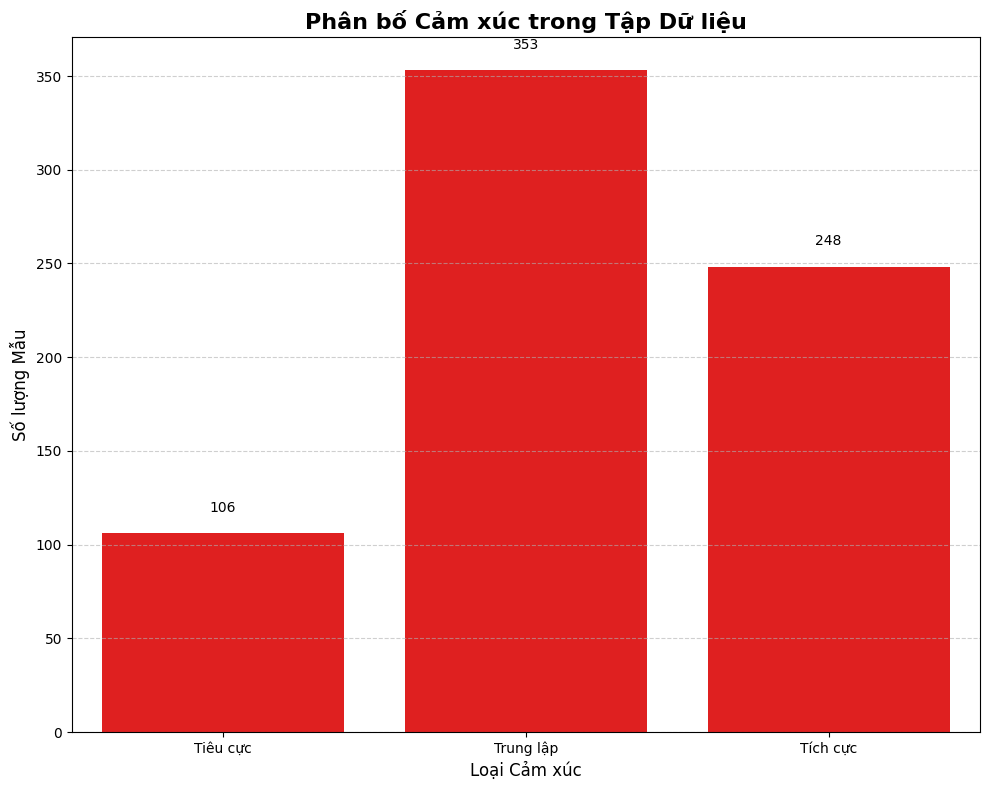

In [38]:
plt.figure(figsize=(10, 8))
palette = {'red'  
}
# Vẽ biểu đồ cột 
sns.barplot(
    x='Sentiments',
    y='Count',
    data=sentiment_counts, 
    palette=palette,
    order=order          
)
# Thêm tiêu đề và nhãn
plt.title('Phân bố Cảm xúc trong Tập Dữ liệu', fontsize=16, fontweight='bold')
plt.xlabel('Loại Cảm xúc', fontsize=12)
plt.ylabel('Số lượng Mẫu', fontsize=12)

# Hiển thị số lượng mẫu trên đỉnh mỗi cột 
for index, row in sentiment_counts.iterrows():
    x_pos = order.index(row['Sentiments'])
    plt.text(x_pos, row['Count'] + 10, str(row['Count']), ha='center', va='bottom', fontsize=10)


plt.grid(axis='y', linestyle='--', alpha=0.6) 
plt.xticks(rotation=0) 
plt.tight_layout() 
plt.show()

# Vectorization và Tách Tập Dữ liệu

In [39]:
#Lưu kết quả sau khi đã xử lý ra file .csv
#File Data_all.csv Lưu trữ 3 thuộc tính: Sentiments - Text (gốc) - Text_ok (đã xử lý)
data_ok.to_csv('Data_all.csv',index=None, header=True)

#File Data_finish.csv chỉ lưu trữ 2 thuộc tính:Sentiments - Text_ok (đã xử lý)
data_ok[['Sentiments','Text_ok']].to_csv('Data_finish.csv',index=None, header=True)

In [40]:
data_finish = pd.read_csv('Data_finish.csv')
data_finish.head(10)

,Sentiments,Text_ok
0,Tích cực,enjoying beautiful day park
1,Tiêu cực,traffic terrible morning
2,Tích cực,finished amazing workout
3,Tích cực,excited upcoming weekend getaway
4,Tích cực,trying new recipe dinner tonight
5,Tiêu cực,feeling grateful little things life
6,Trung lập,rainy days call cozy blankets hot cocoa
7,Tích cực,new movie release mustwatch
8,Trung lập,political discussions heating timeline
9,Tiêu cực,missing summer vibes beach days


In [41]:
#Biến độc lập X:
X = data_finish.loc[:,'Text_ok']
X

0                            enjoying beautiful day park
1                               traffic terrible morning
2                               finished amazing workout
3                       excited upcoming weekend getaway
4                       trying new recipe dinner tonight
                             ...                        
702    collaborating science project received recogni...
703    attending surprise birthday party organized fr...
704    successfully fundraising school charity initia...
705    participating multicultural festival celebrati...
706    organizing virtual talent show challenging tim...
Name: Text_ok, Length: 707, dtype: object

In [42]:
#Biến phụ thuộc y:
y = data_finish.loc[:,'Sentiments']
y

0      Tích cực
1      Tiêu cực
2      Tích cực
3      Tích cực
4      Tích cực
         ...   
702    Tích cực
703    Tích cực
704    Tích cực
705    Tích cực
706    Tích cực
Name: Sentiments, Length: 707, dtype: object

###  Tách dữ liệu thành tập Train - Test
---
* Tập Train (80%) sử dụng để huấn luyện model
* Tập Test (20%) sử dụng để kiểm thử độ chính xác của modoe


In [43]:
from sklearn.model_selection import train_test_split
#Tách tập dữ liệu thành Train - Test (tỷ lệ: 0.8 - 0.2)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Số lượng mẫu Huấn luyện: {len(X_train)}")
print(f"Số lượng mẫu Kiểm tra: {len(X_test)}")
print("---")

Số lượng mẫu Huấn luyện: 565
Số lượng mẫu Kiểm tra: 142
---


Vectorization 

In [44]:
# Tính TF-IDF cho tập dữ liệu
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.feature_extraction.text as text

# Khởi tạo TF-IDF Vectorizer
# ngram_range=(1, 2) bao gồm cả từ đơn và cặp từ (bigram)
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
#Chuyển đổi tập Train - Test ra số:

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [45]:
#Dữ liệu sau khi chuyển sang số với TF-IDF:

print('1.Train:',X_train_tfidf.shape)
print('2.Test:',X_test_tfidf.shape)

1.Train: (565, 5000)
2.Test: (142, 5000)


In [46]:
#Ví dụ một comment:
print(X_train.iloc[20])
print(X_train_tfidf[20].data)
print(X_train_tfidf[20].data.shape)

olympics athletes perseverance shines earning gold medal inspiring generation remarkable achievement
[0.21925253 0.21925253 0.21925253 0.21925253 0.21925253 0.21925253
 0.21925253 0.21925253 0.21925253 0.21925253 0.1963836  0.21925253
 0.21925253 0.21925253 0.21925253 0.21925253 0.21925253 0.21925253
 0.21925253 0.21925253 0.21925253]
(21,)


In [47]:
#Sử dụng mô hình Naive Bayes với TF-IDF
from sklearn import naive_bayes

#Khai báo sử dụng model Multinomial Naive bayes:
MultiNB = naive_bayes.MultinomialNB(alpha=0.75)

#huấn luyện mô hình với tập huấn luyện Train
MultiNB.fit(X_train_tfidf,y_train)

#Danh sách các tham số của model:
MultiNB.get_params()

{'alpha': 0.75, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

In [48]:
#Đánh giá độ chính xác của mô hình trên tập huấn luyện
acc_MultiNB = round(MultiNB.score(X_train_tfidf, y_train) * 100, 2)

print('Độ chính xác của mô hình trên tập huấn luyện: ', acc_MultiNB, '%')

Độ chính xác của mô hình trên tập huấn luyện:  96.46 %


In [49]:
from sklearn.metrics import accuracy_score
#Dự đoán và tính đoán độ chính xác của model trên tập Test:
y_pred = MultiNB.predict(X_test_tfidf)

acc1 = round(accuracy_score(y_test, y_pred)*100, 2)
print('1.Độ chính xác của mô hình trên tập Test: ', acc1, '%')

acc2 = accuracy_score(y_test, y_pred, normalize=False)
print('2.Tổng số mẫu dự đoán đúng:', acc2, ' /', len(y_test))
print('3.Tổng số mẫu dự đoán sai:', len(y_test) - acc2, ' /', len(y_test))

1.Độ chính xác của mô hình trên tập Test:  64.79 %
2.Tổng số mẫu dự đoán đúng: 92.0  / 142
3.Tổng số mẫu dự đoán sai: 50.0  / 142


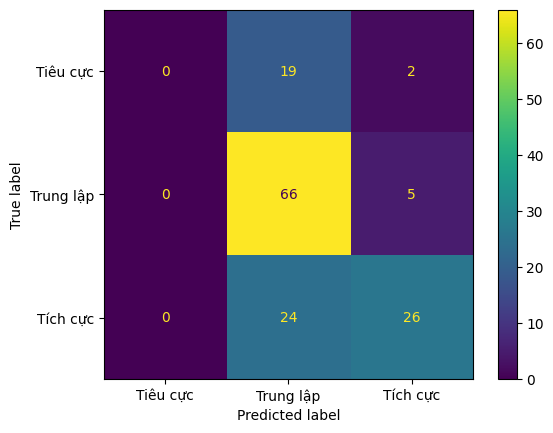

In [50]:
#Hiển thị confusion matrix:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Hiển thị dạng số:
cm = confusion_matrix(y_test, y_pred, labels=MultiNB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=MultiNB.classes_)
disp.plot()
plt.show()